In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
import csv 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv('medical_students_dataset.csv')

In [5]:
data.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [6]:
data.shape

(200000, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [8]:
data.duplicated().sum()

7644

In [9]:
data.isna().sum().sort_values(ascending=False)

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

In [10]:
missing_percentages = data.isna().sum().sort_values(ascending=False)*100 / len(data)
missing_percentages

Student ID        10.0
Age               10.0
Gender            10.0
Height            10.0
Weight            10.0
Blood Type        10.0
BMI               10.0
Temperature       10.0
Heart Rate        10.0
Blood Pressure    10.0
Cholesterol       10.0
Diabetes          10.0
Smoking           10.0
dtype: float64

<Axes: >

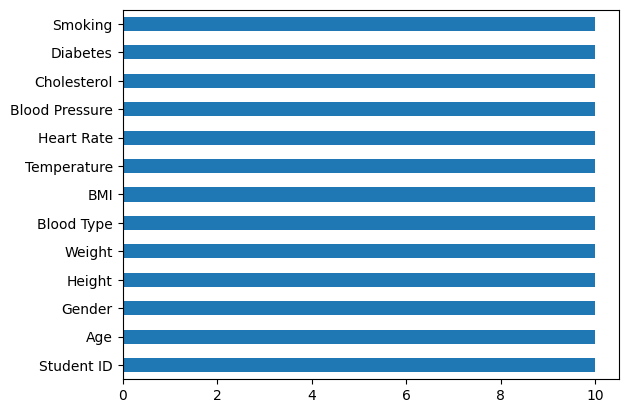

In [11]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

In [12]:
data['Student ID'] = np.arange(1, len(data) + 1, dtype='float64')

In [13]:
numerical_features = data.describe().columns[1:].drop('BMI')
numerical_features

Index(['Age', 'Height', 'Weight', 'Temperature', 'Heart Rate',
       'Blood Pressure', 'Cholesterol'],
      dtype='object')

In [14]:
for col in numerical_features:
    data[col] = data[col].fillna(data[col].median())

In [15]:
#remplacer les valeurs null de bmi
data['BMI'] = (data['Weight'] / pow(data['Height'], 2)) * 10000

In [16]:
data['BMI'].isna().sum()

0

In [17]:
data.isna().sum()

Student ID            0
Age                   0
Gender            20000
Height                0
Weight                0
Blood Type        20000
BMI                   0
Temperature           0
Heart Rate            0
Blood Pressure        0
Cholesterol           0
Diabetes          20000
Smoking           20000
dtype: int64

In [18]:
data['Height'] = data['Height'].replace(np.NaN, data['Height'].mean())
data['Weight'] = data['Weight'].replace(np.NaN, data['Weight'].mean())
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [19]:
data.isna().sum()

Student ID            0
Age                   0
Gender                0
Height                0
Weight                0
Blood Type        20000
BMI                   0
Temperature           0
Heart Rate            0
Blood Pressure        0
Cholesterol           0
Diabetes          20000
Smoking           20000
dtype: int64

In [20]:
data['Temperature'] = data['Temperature'].replace(np.NaN, data['Temperature'].mean())
data['Heart Rate'] = data['Heart Rate'].replace(np.NaN, data['Heart Rate'].mean())
data['Blood Pressure'] = data['Blood Pressure'].replace(np.NaN, data['Blood Pressure'].mean())
data['Cholesterol'] = data['Cholesterol'].replace(np.NaN, data['Cholesterol'].mean())

In [21]:
data.isna().sum()

Student ID            0
Age                   0
Gender                0
Height                0
Weight                0
Blood Type        20000
BMI                   0
Temperature           0
Heart Rate            0
Blood Pressure        0
Cholesterol           0
Diabetes          20000
Smoking           20000
dtype: int64

In [22]:
data.isnull().sum() * 100 / len(data)

Student ID         0.0
Age                0.0
Gender             0.0
Height             0.0
Weight             0.0
Blood Type        10.0
BMI                0.0
Temperature        0.0
Heart Rate         0.0
Blood Pressure     0.0
Cholesterol        0.0
Diabetes          10.0
Smoking           10.0
dtype: float64

les purcentages sont 10% donc sont faibles par rapport au data , on peut les supprimer (nan)

In [23]:
data.dropna(axis=0, inplace=True)

In [24]:
data.dropna(axis=0, inplace=True)

In [25]:
data.isnull().sum()

Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

In [26]:
data = data.drop(['Student ID'], axis=1)

In [27]:
data.shape

(145832, 12)

In [28]:
data_cleaned = data.copy()
data_cleaned.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
1,26.0,Male,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,23.0,Female,174.899914,46.234173,O,15.114156,98.480008,95.0,115.0,231.0,No,No
6,21.0,Male,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No


In [29]:
data_cleaned.describe()

,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,145832.000000,145832.000000,145832.000000,145832.000000,145832.000000,145832.000000,145832.000000,145832.000000
mean,26.023630,174.910452,69.998940,23.311671,98.601259,79.548686,114.598312,184.397423
std,4.642312,13.705770,16.427015,6.666990,0.474679,10.953155,13.685628,35.688872
min,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,22.000000,163.828805,56.672311,18.264226,98.306711,71.000000,103.000000,155.000000
50%,26.000000,174.899914,69.979384,22.836432,98.599654,80.000000,115.000000,184.000000
75%,30.000000,186.073347,83.341874,27.745695,98.897361,88.000000,126.000000,213.000000
max,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


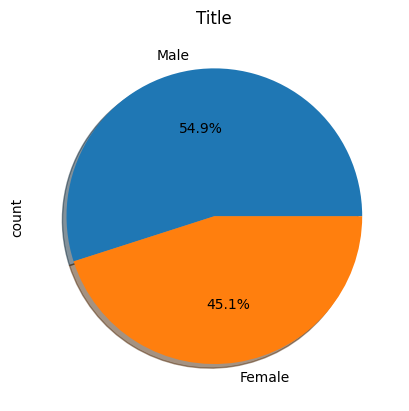

In [30]:
df=data_cleaned['Gender'].value_counts()
plot=df.plot.pie(y='hours', title="Title", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)

<Axes: xlabel='Smoking'>

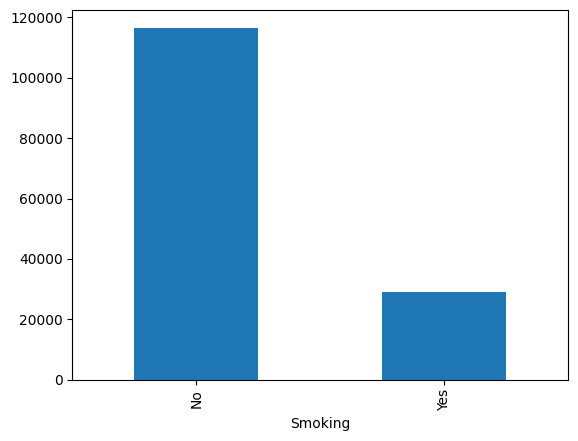

In [31]:
data_cleaned['Smoking'].value_counts().plot(kind='bar')

<Axes: ylabel='Diabetes'>

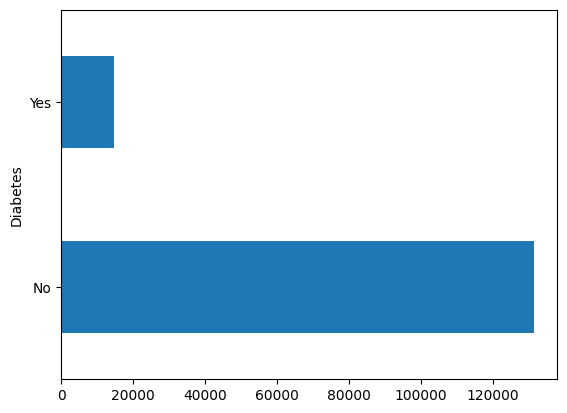

In [32]:
data_cleaned['Diabetes'].value_counts().plot(kind='barh')

C:\Users\Wiem\AppData\Local\Temp\ipykernel_4064\1448807052.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


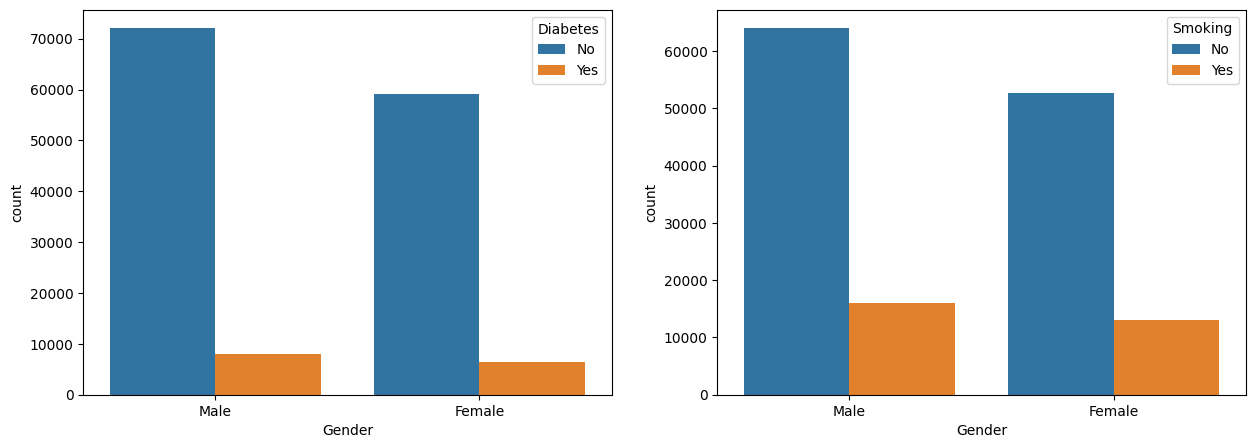

In [33]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='Gender', hue='Diabetes', data=data_cleaned, ax=ax[0])
sns.countplot(x='Gender', hue='Smoking', data=data_cleaned, ax=ax[1])
fig.show()

C:\Users\Wiem\AppData\Local\Temp\ipykernel_4064\3560561497.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


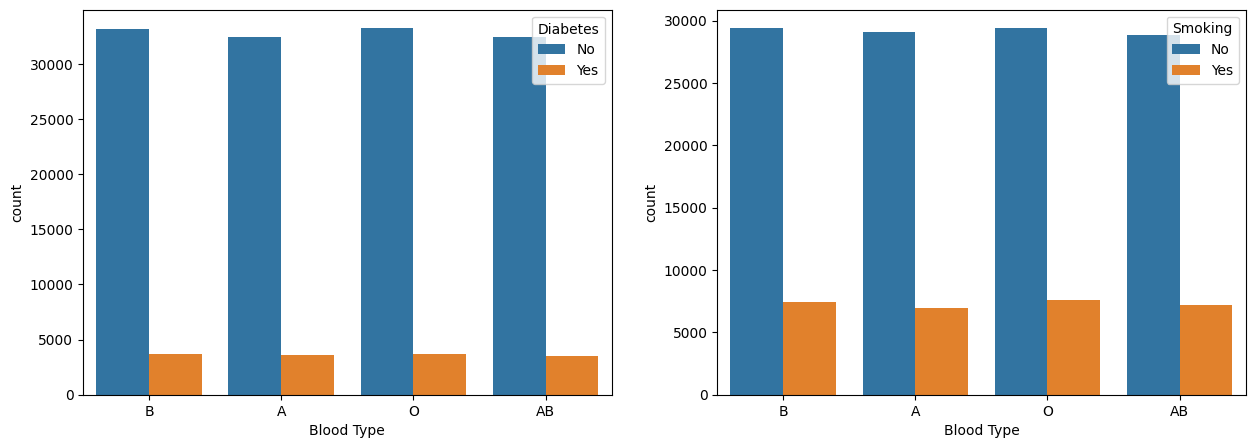

In [34]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='Blood Type', hue='Diabetes', data=data_cleaned, ax=ax[0])
sns.countplot(x='Blood Type', hue='Smoking', data=data_cleaned, ax=ax[1])
fig.show()

In [35]:
data_cleaned.to_csv('data_cleaning_et_exploration.csv', index=False)